<a href="https://colab.research.google.com/github/vanukuriakhila/Mushroom_Project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, cross_validate
from sklearn.metrics import matthews_corrcoef, f1_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import mode

from xgboost import XGBClassifier

from lightgbm import LGBMClassifier

LOAD THE DATASETS

In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/train.csv')

test_df = pd.read_csv("/content/drive/MyDrive/test.csv")

The **train_df.head()** command in Python will display the first few rows of the **train_df** DataFrame. This is a useful way to get a quick overview of the data and its structure.

In [3]:
train_df.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [4]:
test_df.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,8.64,x,NaN,n,t,NaN,NaN,w,11.13,17.12,b,NaN,w,u,w,t,g,NaN,d,a
1,6.90,o,t,o,f,NaN,c,y,1.27,10.75,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
2,2.00,b,g,n,f,NaN,c,n,6.18,3.14,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3,3.47,x,t,n,f,s,c,n,4.98,8.51,NaN,NaN,w,NaN,n,t,z,NaN,d,u
4,6.17,x,h,y,f,p,NaN,y,6.73,13.70,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


## Exploratory Data Analysis

The **train_df.info()** method provides a concise summary of the DataFrame's structure, including:

**Data types:** Shows the data type of each column (e.g., integer, object, boolean).

**Non-null count:** Indicates the number of non-null (not missing) values in each column.

**Memory usage:** Estimates the amount of memory used by the DataFrame.

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   class                 1048575 non-null  object 
 1   cap-diameter          1048574 non-null  float64
 2   cap-shape             1048558 non-null  object 
 3   cap-surface           822881 non-null   object 
 4   cap-color             1048572 non-null  object 
 5   does-bruise-or-bleed  1048573 non-null  object 
 6   gill-attachment       872245 non-null   object 
 7   gill-spacing          626042 non-null   object 
 8   gill-color            1048557 non-null  object 
 9   stem-height           1048575 non-null  float64
 10  stem-width            1048575 non-null  float64
 11  stem-root             121188 non-null   object 
 12  stem-surface          382035 non-null   object 
 13  stem-color            1048563 non-null  object 
 14  veil-type             53524 non-nu





 The below code Creates a DataFrame to display column names, null counts, and percentages.
Sorts the DataFrame by null counts in descending order.

In [6]:
pd.DataFrame({
    'column': train_df.columns,
    'null-count': train_df.isna().sum().values,
    '% null-count': np.round(train_df.isna().sum().values*100/len(train_df),6)
}).sort_values(by='null-count', ascending=False).reset_index(drop=True)

,column,null-count,% null-count
0,veil-type,995051,94.895549
1,spore-print-color,958822,91.440479
2,stem-root,927387,88.442601
3,veil-color,922192,87.947166
4,stem-surface,666540,63.566269
5,gill-spacing,422533,40.295925
6,cap-surface,225694,21.523878
7,gill-attachment,176330,16.816155
8,ring-type,43214,4.121212
9,habitat,18,0.001717


The **train_df.describe().T** command in Python provides a statistical summary of the numerical columns in the train_df DataFrame. The **.T** method transposes the resulting DataFrame, making it easier to read the statistics for each column.

In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,1048574.0,6.308374,4.648956,0.4,3.32,5.75,8.24,80.67
stem-height,1048575.0,6.348367,2.698178,0.0,4.68,5.88,7.41,88.72
stem-width,1048575.0,11.155045,8.103385,0.0,4.97,9.65,15.63,102.90


The **train_df.describe(include='O').T** command in Python provides a statistical summary of the categorical (object) columns in the train_df DataFrame. The **.T** method transposes the resulting DataFrame, making it easier to read the statistics for each column.

In [8]:
train_df.describe(include='O').T

,count,unique,top,freq
class,1048575,2,p,574086
cap-shape,1048558,38,x,482903
cap-surface,822881,50,t,155187
cap-color,1048572,46,n,457296
does-bruise-or-bleed,1048573,18,f,864524
gill-attachment,872245,42,a,217299
gill-spacing,626042,21,c,448920
gill-color,1048557,45,w,313049
stem-root,121188,29,b,55820
stem-surface,382035,38,s,109544


The **train_df.duplicated().sum()** command in Python calculates the total number of duplicate rows in the **train_df DataFrame**.


The output will be representing the number of duplicate rows in the DataFrame. This information is helpful for identifying and removing redundant data, which can improve the quality and efficiency of data analysis.

In [9]:
train_df.duplicated().sum()

np.int64(0)

The **train_df.drop_duplicates(inplace=True)** command removes duplicate rows from the train_df DataFrame and modifies the original DataFrame in place.

This operation is often used to clean the data and ensure that each row in the DataFrame represents a unique observation

In [10]:
train_df.drop_duplicates(inplace=True)

The variable  **target = 'class'**  is likely being used to specify the target variable in a machine learning problem. In this case, the target variable, or label, is the column named 'class' in the dataset. This column is likely to contain the outcome or prediction that the machine learning model is trying to learn to predict.

In [11]:
target = 'class'

The below code Extracts column names from train_df excluding the target column.
Converts the column names to a list.

In [12]:
features = train_df.drop(target, axis=1).columns.to_list()
features

['cap-diameter',
 'cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-height',
 'stem-width',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-type',
 'veil-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']

The below code identifies features in the train_df DataFrame that have more than 20% missing values. Here's a breakdown of what it does:

### Outcome:

The resulting features_with_high_null_values list will contain the names of features that have a high proportion of missing data. This information is helpful for deciding how to handle these features, such as imputation, removal, or feature engineering techniques.

In [13]:
features_with_high_null_values = [feature for feature in features if (train_df[feature].isna().sum()/len(train_df)*100)>20]
features_with_high_null_values

['cap-surface',
 'gill-spacing',
 'stem-root',
 'stem-surface',
 'veil-type',
 'veil-color',
 'spore-print-color']



The resulting **categorical_features** list will contain the names of all the categorical features in the **train_df** DataFrame. This information is helpful for understanding the nature of the data and for performing appropriate preprocessing steps, such as encoding categorical variables into numerical representations.

In [14]:
categorical_features = train_df[features].select_dtypes(include='object').columns.to_list()
categorical_features

['cap-shape',
 'cap-surface',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-spacing',
 'gill-color',
 'stem-root',
 'stem-surface',
 'stem-color',
 'veil-type',
 'veil-color',
 'has-ring',
 'ring-type',
 'spore-print-color',
 'habitat',
 'season']

The below code Identifies numerical features by subtracting categorical features from all features.
Converts the result to a list.

In [15]:
numerical_features = list(set(features) - set(categorical_features))
numerical_features

['stem-width', 'cap-diameter', 'stem-height']

The following code Concatenates training and testing data.
Calculates descriptive statistics for categorical features.
Transposes the result for better readability.

In [16]:
pd.concat([train_df, test_df])[categorical_features].describe(include='O').T

,count,unique,top,freq
cap-shape,2097116,57,x,965997
cap-surface,1646119,70,t,310061
cap-color,2097140,62,n,914525
does-bruise-or-bleed,2097141,24,f,1729215
gill-attachment,1744744,61,a,434824
gill-spacing,1251166,31,c,897076
gill-color,2097108,59,w,626554
stem-root,242157,32,b,111665
stem-surface,763866,52,s,219733
stem-color,2097128,52,w,805163


# Bar Plots

# Histograms

Creates subplots for multiple numerical features.
Plots histograms with KDE lines for each feature, colored by target variable.
Uses custom color palette and adjusts figure size for efficiency.
Displays overall title for clarity.

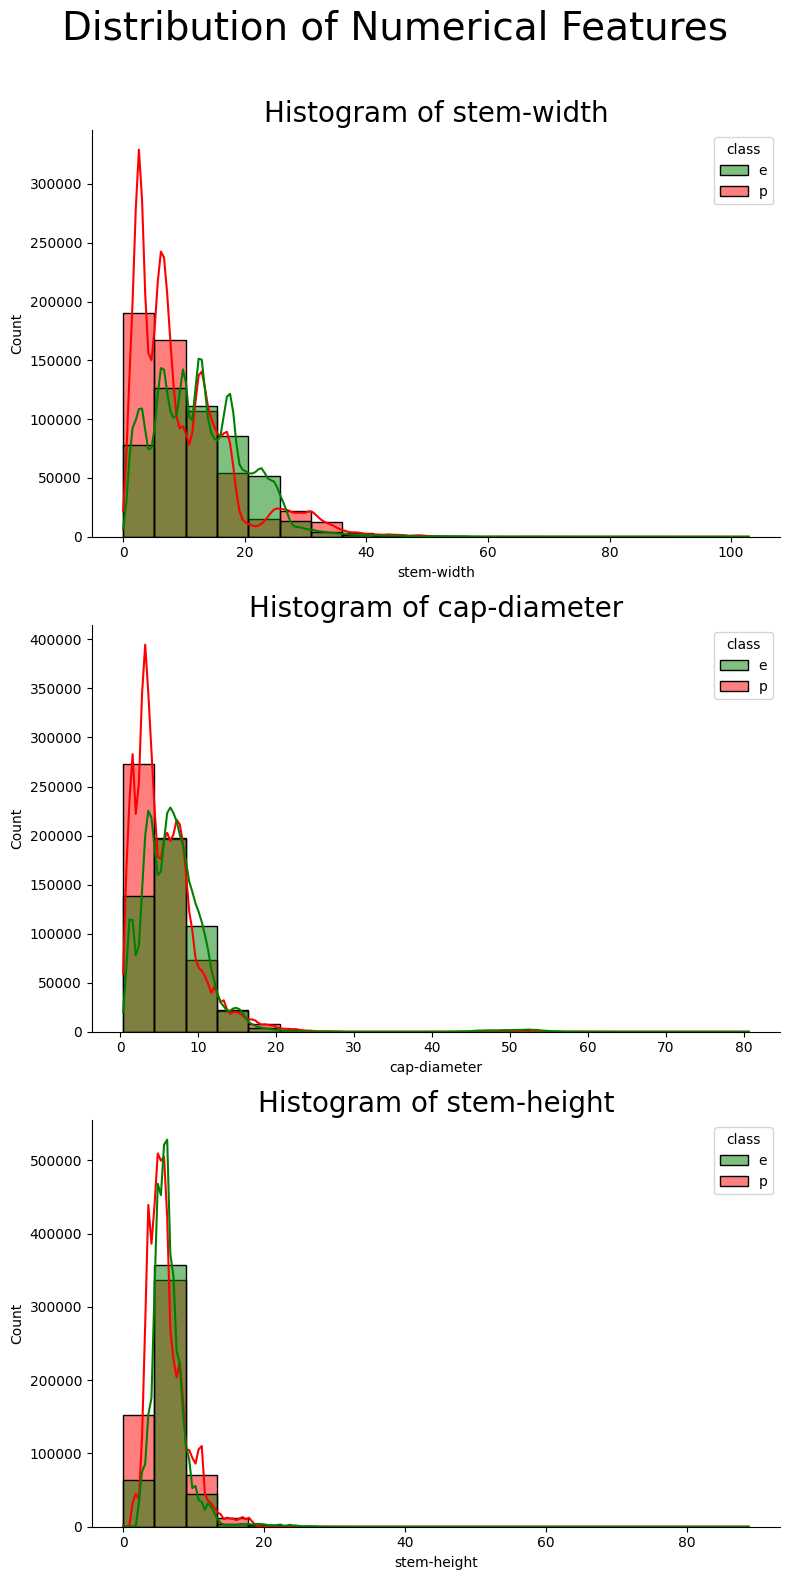

In [17]:
palette = ['green', 'red']  # Customize these colors as needed

plt.figure(figsize=(8, 15))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 1, i+1)

    # Use the custom palette in sns.histplot
    sns.histplot(x=col, hue=target, data=train_df, kde=True, bins=20, palette=palette)

    plt.title(f"Histogram of {col}", size=20)
    sns.despine()
plt.tight_layout()
plt.suptitle("Distribution of Numerical Features", y=1.05, size=28)
plt.show()

# BoxPlot

Creates subplots for multiple numerical features.
Plots boxplots for each feature, colored by target variable.
Uses custom color palette and adjusts figure size for efficiency.
Displays overall title for clarity.

This visualization helps identify patterns in the data, such as:

**Central tendency** , **Spread**, **Outliers:**



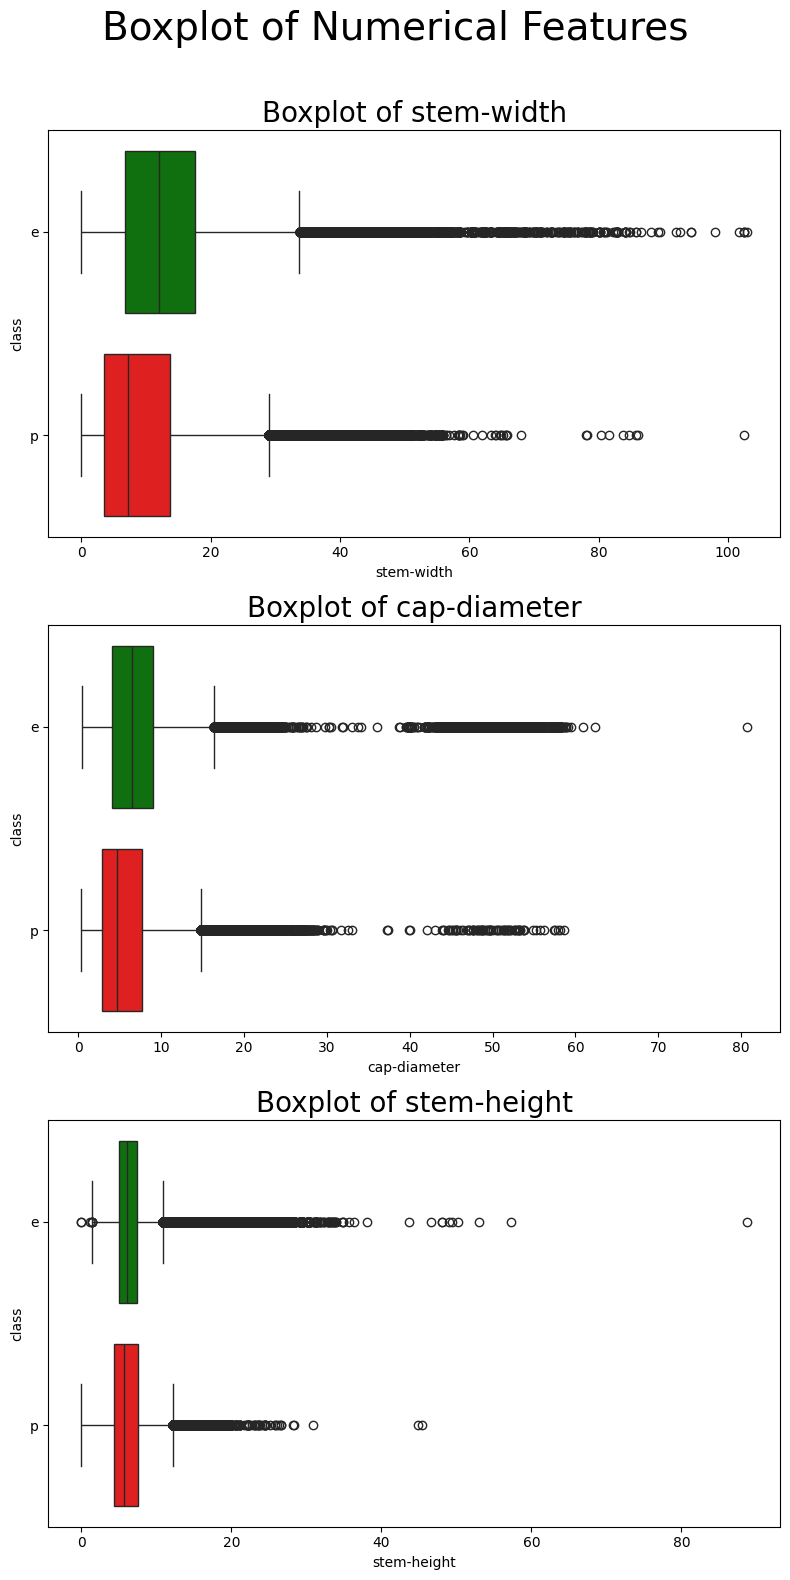

In [18]:
palette = ['green', 'red']  # Customize these colors as needed

plt.figure(figsize=(8, 15))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 1, i+1)

    # Use the custom palette in sns.boxplot
    sns.boxplot(x=col, y=target, hue=target, data=train_df, palette=palette)

    plt.title(f"Boxplot of {col}", size=20)
plt.tight_layout()
plt.suptitle("Boxplot of Numerical Features", y=1.05, size=28)
plt.show()

# Violin Plots

Creates subplots for multiple numerical features.
Plots violin plots for each feature, colored by target variable (swapped x and y axes).
Uses custom color palette and adjusts figure size for efficiency.
Displays overall title for clarity.

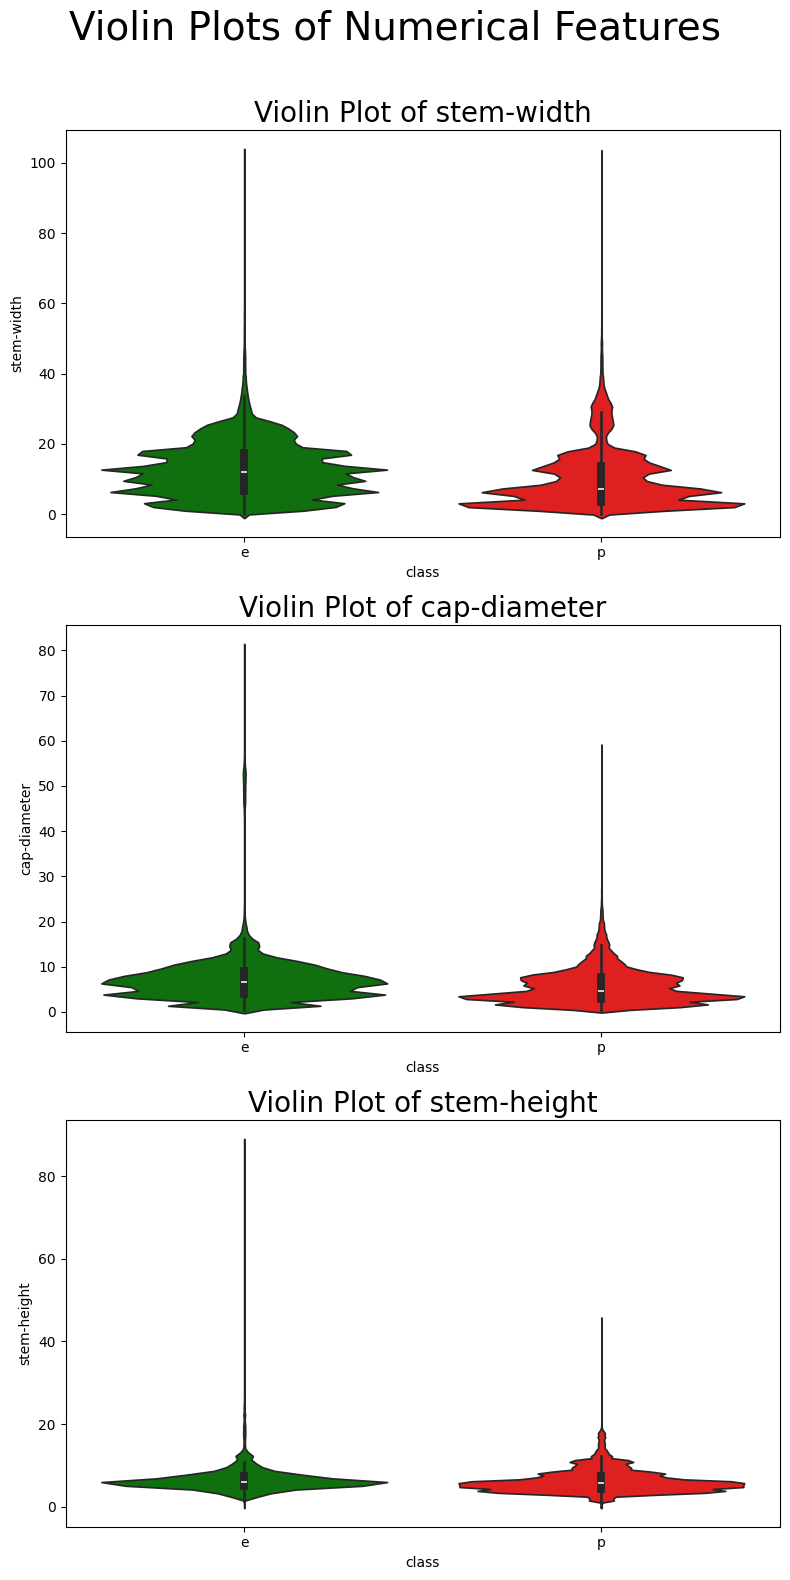

In [19]:
palette = ['green', 'red']  # Customize these colors as needed

plt.figure(figsize=(8, 15))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 1, i+1)

    # Use the custom palette in sns.violinplot
    sns.violinplot(x=target, y=col, hue=target, data=train_df, palette=palette)

    plt.title(f"Violin Plot of {col}", size=20)
plt.tight_layout()
plt.suptitle("Violin Plots of Numerical Features", y=1.05, size=28)
plt.show()

## Target Distribution
Creates a count plot for the target variable.
Colors bars with custom palette ('green', 'red').
Displays title ("Target Distribution") and shows the plot.

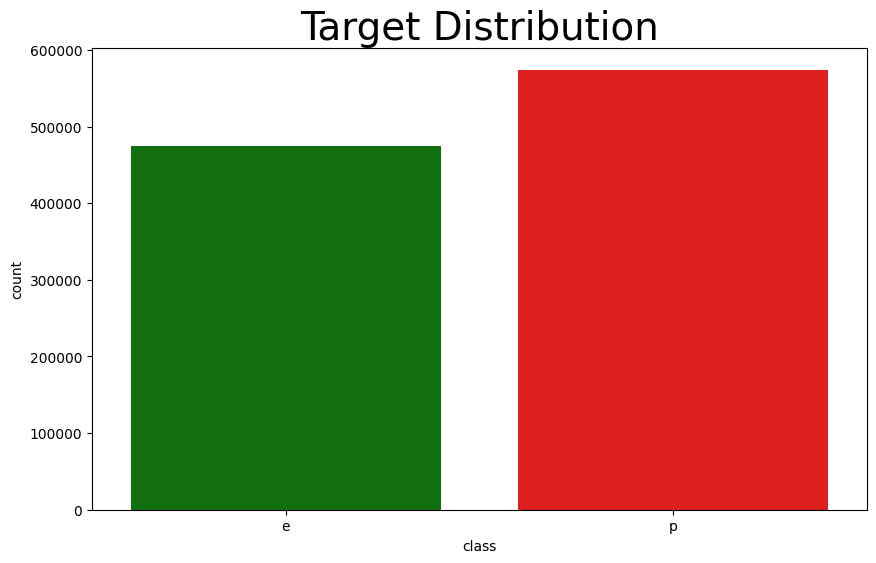

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x=target, data=train_df, palette=['green', 'red'])
plt.title("Target Distribution", size=28)
plt.show()

### Cleaner Function

The cleaner function is designed to preprocess categorical features in a DataFrame, handling missing values and rare categories.
Functionality:

In [21]:
def cleaner(df):
    for col in categorical_features:
        df[col] = df[col].fillna('missing')
        df.loc[df[col].value_counts(dropna=False)[df[col]].values < 100, col] = "noise"
        df[col] = df[col].astype('category')

    return df

Calculates the mean of cap-diameter across both training and testing data.
Fills missing values in cap-diameter with the calculated mean in both DataFrames.

In [22]:
cap_diameter_mean = pd.concat([train_df['cap-diameter'], test_df['cap-diameter']]).mean(numeric_only=True)
train_df['cap-diameter'].fillna(cap_diameter_mean, inplace=True)
test_df['cap-diameter'].fillna(cap_diameter_mean, inplace=True)

Creates a copy of train_df as X.
Extracts the target variable (y) from X and removes it.
Fits a label encoder on y to convert categorical labels to numerical values.
Transforms y using the trained label encoder.

In [23]:
X = train_df.copy()
y = X.pop(target)

lab_enc = LabelEncoder().fit(y)
y = lab_enc.transform(y)

The below code has a function which is a valuable tool for evaluating machine learning models. It provides a standardized report with essential metrics (F1 score, MCC) and a visual representation of the model's performance through a confusion matrix.

In [24]:
def model_report(estimator, X, y, cv=5):
    print("="*80)
    print(f"    Model: {estimator.__class__.__name__}")
    print("="*80)

    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=1/cv, shuffle=True, stratify=y, random_state=42)

    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    print(f"F1 Score : {f1.mean():.6f}")
    print(f"MCC Score: {mcc.mean():.6f}")

    ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
    plt.title("Confusion Matrix")
    plt.show()

    print()

The below function effectively performs stratified KFold cross-validation for a machine learning model.
It calculates OOF predictions and MCC scores for each fold and provides a summary of the model's performance across the folds.
The returned values can be used for further analysis, such as stacking models or evaluating the generalization ability of the model.

In [25]:
def model_trainer(model, X, y, n_splits=5, random_state=42):
    skfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_state)

    oof_probs, oof_mccs = [], []
    print("="*80)
    print(f"Training {model.__class__.__name__}")
    print("="*80, end="\n")
    for fold, (train_idx, test_idx) in enumerate(skfold.split(X, y)):
        X_train, y_train = X.iloc[train_idx, :], y[train_idx]
        X_test, y_test = X.iloc[test_idx, :], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        mcc = matthews_corrcoef(y_pred, y_test)
        oof_mccs.append(mcc)
        oof_probs.append(model.predict_proba(test_df))
        print(f"--- Fold {fold+1} MCC Score: {mcc:.6f}")
    print(f"\n---> Mean MCC Score: {np.mean(oof_mccs):.6f} \xb1 {np.std(oof_mccs):.6f}\n\n")
    return oof_probs, oof_mccs

## BASELINE MODELS


XGBoost

In [26]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, fbeta_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np

# ✅ Step 1: Convert all object columns to category BEFORE splitting
for col in X.select_dtypes(include="object").columns:
    X[col] = X[col].astype("category")

# ✅ Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 3: Ensure category levels in train and test are the same
for col in X.select_dtypes(include="category").columns:
    X_train[col] = X_train[col].cat.set_categories(X[col].cat.categories)
    X_test[col] = X_test[col].cat.set_categories(X[col].cat.categories)

# ✅ Step 4: Train the XGBoost classifier
xgb_clf = XGBClassifier(enable_categorical=True, device="cuda", tree_method="hist")
xgb_clf.fit(X_train, y_train)

# ✅ Step 5: Make predictions
y_pred = xgb_clf.predict(X_test)

# ✅ Step 6: Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
f2_score = fbeta_score(y_test, y_pred, beta=2)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# ✅ Step 7: Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"F2 Score: {f2_score:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")


Accuracy: 0.9918
F2 Score: 0.9919
Mean Squared Error (MSE): 0.0082
Mean Absolute Error (MAE): 0.0082


In [27]:
from lightgbm import LGBMClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, fbeta_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import numpy as np

def handle_unseen_labels(le, test_values):
    """Helper function to handle unseen labels in the test set."""
    seen_labels = le.classes_
    return np.array([le.transform([val])[0] if val in seen_labels else -1 for val in test_values])

def model_report(estimator, X, y, test_size=0.2):
    print("="*80)
    print(f"    Model: {estimator.__class__.__name__}")
    print("="*80)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)

    # Separate numeric and categorical columns
    numeric_cols = X_train.select_dtypes(include=np.number).columns
    categorical_cols = X_train.select_dtypes(exclude=np.number).columns

    # Impute missing values for numeric data using mean strategy
    if len(numeric_cols) > 0:  # Check if there are any numeric columns
        imputer_numeric = SimpleImputer(strategy='mean')
        X_train[numeric_cols] = imputer_numeric.fit_transform(X_train[numeric_cols])
        X_test[numeric_cols] = imputer_numeric.transform(X_test[numeric_cols])

    # Impute missing values for categorical data using most frequent strategy
    if len(categorical_cols) > 0:  # Check if there are any categorical columns
        imputer_categorical = SimpleImputer(strategy='most_frequent')
        X_train[categorical_cols] = imputer_categorical.fit_transform(X_train[categorical_cols])
        X_test[categorical_cols] = imputer_categorical.transform(X_test[categorical_cols])

    # Encode categorical features using LabelEncoder
    for col in categorical_cols:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        # Use the helper function to handle unseen labels in the test set
        X_test[col] = handle_unseen_labels(le, X_test[col])

    # Train the model
    estimator.fit(X_train, y_train)

    # Make predictions
    y_pred = estimator.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    f2_score = fbeta_score(y_test, y_pred, beta=2)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    # Print the metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F2 Score: {f2_score:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print()

# Initialize the LightGBM classifier
lgb_clf = LGBMClassifier()

# Call the model_report function with the LightGBM classifier
model_report(lgb_clf, X, y)


    Model: LGBMClassifier
[LightGBM] [Info] Number of positive: 459269, number of negative: 379591
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.197732 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 963
[LightGBM] [Info] Number of data points in the train set: 838860, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.547492 -> initscore=0.190542
[LightGBM] [Info] Start training from score 0.190542
Accuracy: 0.9868
F2 Score: 0.9866
Mean Squared Error (MSE): 0.0132
Mean Absolute Error (MAE): 0.0132



In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, fbeta_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Encode target variable
y_encoder = LabelEncoder()
y_encoded = y_encoder.fit_transform(y)  # Encode target variable

# Define numeric and categorical columns
numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X.select_dtypes(exclude=np.number).columns.tolist()

# Store encoders for later
encoders = {}

def model_report(estimator, X, y, test_size=0.2):
    print("="*80)
    print(f"    Model: {estimator.__class__.__name__}")
    print("="*80)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)

    # Impute numeric
    imputer_numeric = SimpleImputer(strategy='mean')
    X_train[numeric_cols] = imputer_numeric.fit_transform(X_train[numeric_cols])
    X_test[numeric_cols] = imputer_numeric.transform(X_test[numeric_cols])

    # Impute categorical
    imputer_categorical = SimpleImputer(strategy='most_frequent')
    X_train[categorical_cols] = imputer_categorical.fit_transform(X_train[categorical_cols])
    X_test[categorical_cols] = imputer_categorical.transform(X_test[categorical_cols])

    # Encode categorical features
    for col in categorical_cols:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        encoders[col] = le
        X_test[col] = X_test[col].apply(lambda val: le.transform([val])[0] if val in le.classes_ else -1)

    # Fit model
    estimator.fit(X_train, y_train)

    # Predict
    y_pred = estimator.predict(X_test)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    f2_score_val = fbeta_score(y_test, y_pred, beta=2)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"F2 Score: {f2_score_val:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print()

# Train the model
dt_clf = DecisionTreeClassifier(random_state=42)
model_report(dt_clf, X, y_encoded)

# Save numeric means
numeric_means = X[numeric_cols].mean()

# Define full form mappings
full_form_mappings = {
    'cap-shape': {'bell': 'b', 'conical': 'c', 'convex': 'x', 'flat': 'f', 'knobbed': 'k', 'sunken': 's'},
    'cap-surface': {'fibrous': 'f', 'grooves': 'g', 'scaly': 'y', 'smooth': 's'},
    'cap-color': {'brown': 'n', 'buff': 'b', 'cinnamon': 'c', 'gray': 'g', 'green': 'r',
                  'pink': 'p', 'purple': 'u', 'red': 'e', 'white': 'w', 'yellow': 'y'},
    'does-bruise-or-bleed': {'bruises': 't', 'no': 'f'},
    'gill-attachment': {'attached': 'a', 'descending': 'd', 'free': 'f', 'notched': 'n'},
    'gill-spacing': {'close': 'c', 'crowded': 'w', 'distant': 'd'},
    'gill-color': {'black': 'k', 'brown': 'n', 'buff': 'b', 'chocolate': 'h', 'gray': 'g',
                   'green': 'r', 'orange': 'o', 'pink': 'p', 'purple': 'u', 'red': 'e', 'white': 'w', 'yellow': 'y'},
    'stem-root': {'bulbous': 'b', 'club': 'c', 'cup': 'u', 'equal': 'e', 'rhizomorphs': 'z', 'rooted': 'r', 'missing': '?'},
    'stem-surface': {'fibrous': 'f', 'scaly': 'y', 'silky': 'k', 'smooth': 's'},
    'stem-color': {'brown': 'n', 'buff': 'b', 'cinnamon': 'c', 'gray': 'g', 'orange': 'o',
                   'pink': 'p', 'red': 'e', 'white': 'w', 'yellow': 'y'},
    'veil-type': {'partial': 'p', 'universal': 'u'},
    'veil-color': {'brown': 'n', 'orange': 'o', 'white': 'w', 'yellow': 'y'},
    'has-ring': {'yes': 't', 'no': 'f'},
    'ring-type': {'evanescent': 'e', 'flaring': 'f', 'large': 'l', 'none': 'n', 'pendant': 'p'},
    'spore-print-color': {'black': 'k', 'brown': 'n', 'buff': 'b', 'chocolate': 'h', 'green': 'r',
                          'orange': 'o', 'purple': 'u', 'white': 'w', 'yellow': 'y'},
    'habitat': {'grasses': 'g', 'leaves': 'l', 'meadows': 'm', 'paths': 'p', 'urban': 'u', 'waste': 'w', 'woods': 'd'},
    'season': {'autumn': 'a', 'spring': 'p', 'summer': 'u', 'winter': 'w'}
}


    Model: DecisionTreeClassifier
Accuracy: 0.9807
F2 Score: 0.9827
Mean Squared Error (MSE): 0.0193
Mean Absolute Error (MAE): 0.0193



In [29]:
def predict_from_user_input():
    print("\n🔍 Please enter mushroom characteristics:")
    user_data = {}

    for col in X.columns:
        val = input(f"{col} ({'Numeric' if col in numeric_cols else 'Category'}): ").strip().lower()
        user_data[col] = val

    input_df = pd.DataFrame([user_data])

    # Numeric columns
    for col in numeric_cols:
        input_df[col] = pd.to_numeric(input_df[col], errors='coerce').fillna(numeric_means[col])

    # Categorical columns
    for col in categorical_cols:
        input_value = input_df[col].iloc[0]

        # Convert to short-form if mapping exists
        if col in full_form_mappings and input_value in full_form_mappings[col]:
            input_value = full_form_mappings[col][input_value]

        # Handle unknowns
        if input_value not in encoders[col].classes_:
            input_value = encoders[col].classes_[0]

        input_df[col] = encoders[col].transform([input_value])

    # Predict
    prediction_encoded = dt_clf.predict(input_df)[0]
    prediction_label = y_encoder.inverse_transform([prediction_encoded])[0]

    if prediction_label == 'e':
        print("\n✅ Prediction: 🍄 **Edible**")
    else:
        print("\n⚠️ Prediction: ☠️ **Poisonous**")

# Run it
predict_from_user_input()



🔍 Please enter mushroom characteristics:
cap-diameter (Numeric): 8.8
cap-shape (Category): f
cap-surface (Category): s
cap-color (Category): u
does-bruise-or-bleed (Category): f
gill-attachment (Category): a
gill-spacing (Category): c
gill-color (Category): w
stem-height (Numeric): 4.51
stem-width (Numeric): 15.39
stem-root (Category): 
stem-surface (Category): 
stem-color (Category): w
veil-type (Category): 
veil-color (Category): 
has-ring (Category): f
ring-type (Category): f
spore-print-color (Category): 
habitat (Category): d
season (Category): a

⚠️ Prediction: ☠️ **Poisonous**


In [30]:



# Sample 5 rows
sample = X.sample(20, random_state=42)

# Encode the sample with the same label encoders used during training
encoded_sample = sample.copy()
for col in encoded_sample.columns:
    if col in categorical_features:
        le = LabelEncoder()
        le.fit(X[col])  # fit on the entire feature column (training data)
        encoded_sample[col] = le.transform(encoded_sample[col])

# Predict and decode results
preds = dt_clf.predict(encoded_sample)
decoded_preds = lab_enc.inverse_transform(preds)

# Show results
sample["Predicted Class"] = decoded_preds
print("Sample Predictions:")
print(sample[["Predicted Class"]])


Sample Predictions:
        Predicted Class
781974                e
937737                p
907828                e
784628                p
662460                e
280139                e
355572                e
749979                e
374753                e
17327                 p
658472                e
700377                p
880383                p
677181                p
18941                 p
735693                p
1034300               p
389058                p
473202                p
677891                e


CALORIES IN TAKE FOR 100 GRAM OF MUSHROOM



In [31]:
import pandas as pd
import numpy as np

# Load the train dataset
# Changed the file path to the correct train dataset
train_path = '/content/drive/MyDrive/train.csv'
train = pd.read_csv(train_path)

# Add the 'calories' column with default value NA
train['calories'] = None

# Assign random calorie values (15-35) for rows where class is 'e'
# Make sure the column name 'class' is correct (check for typos or whitespace)
train.loc[train['class'] == 'e', 'calories'] = np.random.uniform(15, 35, size=(train['class'] == 'e').sum())

# Save the modified dataset (if needed)
train.to_csv('/content/modified_train.csv', index=False)

# Display the first few rows to verify
train.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,calories
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,w,NaN,NaN,f,f,NaN,d,a,32.949244
1,p,4.51,x,h,o,f,a,c,n,4.79,...,y,o,NaN,NaN,t,z,NaN,d,w,None
2,e,6.94,f,s,b,f,x,c,w,6.85,...,s,n,NaN,NaN,f,f,NaN,l,w,17.457889
3,e,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,w,NaN,NaN,f,f,NaN,d,u,34.952373
4,e,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,w,NaN,NaN,f,f,NaN,g,a,29.930817


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load datasets
TRAIN_DATA_PATH = "/content/modified_train.csv"

TEST_DATA_PATH = "/content/drive/MyDrive/test.csv"

train_df = pd.read_csv(TRAIN_DATA_PATH)  # Train data

test_df = pd.read_csv(TEST_DATA_PATH)  # Test data



# Drop rows with missing 'calories' values in the combined train dataset
train_df = train_df.dropna(subset=['calories'])

# Split features and target
X = train_df.drop(columns=['calories', 'class'])  # Drop target and irrelevant columns
y = train_df['calories']

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# **Updated Label Encoding**
def label_encode(train, val, test, cols_to_encode):
    """Label encode object type columns consistently across train, val, and test"""
    encoders = {}
    for col in cols_to_encode:
        le = LabelEncoder()
        train[col] = le.fit_transform(train[col].astype(str))
        encoders[col] = le
        for dataset, name in zip([val, test], ['val', 'test']):
            unseen_labels = [x for x in dataset[col].astype(str).unique() if x not in le.classes_]
            if unseen_labels:
                print(f"Unseen labels in {name} data for column {col}: {unseen_labels}")
                le.classes_ = np.append(le.classes_, unseen_labels)  # Add unseen labels
            dataset[col] = le.transform(dataset[col].astype(str))
    return train, val, test

# Apply label encoding to object columns
object_cols = X_train.select_dtypes(include=['object']).columns
X_train, X_val, test_df = label_encode(X_train, X_val, test_df, object_cols)

# Initialize and train XGBoost regressor
xgb_params = {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'random_state': 42}
model = xgb.XGBRegressor(**xgb_params)
model.fit(X_train, y_train)

# Validate model
y_val_pred = model.predict(X_val)

# Predict calories for the test dataset
X_test = test_df.drop(columns=['class'], errors='ignore')  # Drop irrelevant columns
test_df['calories_pred'] = model.predict(X_test)

# Save predictions
OUTPUT_PATH = "/content/test_with_calories_predictions.csv"
test_df.to_csv(OUTPUT_PATH, index=False)




Unseen labels in val data for column cap-shape: ['u', '5 f', '7.43', '24.16']
Unseen labels in test data for column cap-shape: ['i', '7.21', 'k', '3.34', '8.3', '3.32', '19.76', 'is f', '0.93', 'z', 'p f', 'h', '1.25', '4.55', 'ring-type', '11.43', '6', '5.59', '4.41', '3.73', '3.47', '6.75', '51.63']
Unseen labels in val data for column cap-surface: ['1.43']
Unseen labels in test data for column cap-surface: ['r', 'season', '6.04', 'z', '10.09', 'spore-print-color', '2.97', 'class', '7.78', '5.05', '5.92', '5.98', '11.96', '7.96', '9.53', '17.98', 'habitat', '2.47', '20.64', '8.34', 'has-ring', 'does None', '1.95', '16.48', '5.84']
Unseen labels in val data for column cap-color: ['4.89']
Unseen labels in test data for column cap-color: ['z', '10.93', 'ring-type', 'a', '0.73', '19.18', '5.35', '21.38', 'has-ring', '5.38', 'class', '7.41', '18.49', 'habitat', '5.16', '4.5', '4.75', '17.01', '3', '24.74']
Unseen labels in val data for column does-bruise-or-bleed: ['o']
Unseen labels in t